In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(
    "./Womens Clothing E-Commerce Reviews.csv",
    index_col=[0],
)

In [3]:
df.head(5)

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [4]:
df.shape

(23486, 10)

In [5]:
df.isnull().sum() / len(df) * 100

Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
df.drop(labels=["Clothing ID", "Title"], axis=1, inplace=True)

In [8]:
df[df["Review Text"].isnull()]

Age Review Text  Rating  Recommended IND  Positive Feedback Count  \
92      23         NaN       5                1                        0   
93      31         NaN       5                1                        0   
98      50         NaN       5                1                        0   
135     35         NaN       4                1                        0   
142     35         NaN       5                1                        0   
...    ...         ...     ...              ...                      ...   
23258   35         NaN       4                1                        0   
23301   52         NaN       5                1                        0   
23303   46         NaN       5                1                        0   
23470   39         NaN       5                1                        0   
23480   35         NaN       5                1                        0   

        Division Name Department Name Class Name  
92     General Petite            Tops      Knits  
93            General         Dresses    Dresses  
98            General         Jackets  Outerwear  
135    General Petite            Tops      Knits  
142           General         Jackets  Outerwear  
...               ...             ...        ...  
23258         General            Tops      Knits  
23301         General            Tops      Knits  
23303         General            Tops    Blouses  
23470  General Petite         Dresses    Dresses  
23480  General Petite            Tops      Knits  

[845 rows x 8 columns]

In [9]:
df = df[~df["Review Text"].isnull()]

In [10]:
df.shape

(22641, 8)

# Data analysis and visualization of the data


In [11]:
import plotly.express as px

In [12]:
px.histogram(df, x="Age")

In [13]:
px.histogram(df, x="Rating")

In [14]:
px.histogram(df, x="Class Name")

In [15]:
px.scatter(
    df,
    x="Age",
    y="Positive Feedback Count",
    facet_row="Recommended IND",
    facet_col="Rating",
    trendline="ols",
    trendline_color_override="red",
    category_orders={"Rating": [1, 2, 3, 4, 5], "Recommended IND": [0, 1]},
)

In [16]:
px.violin(df, x="Age", y="Department Name", orientation="h", color="Recommended IND")

In [17]:
px.box(df, x="Age", y="Division Name", orientation="h", color="Recommended IND")

# Cleaning the data


In [18]:
err1 = df["Review Text"].str.extractall("(&amp)")
err2 = df["Review Text"].str.extractall("(\xa0)")

In [19]:
print("with (&amp)", len(err1[~err1.isna()]))
print("with (\xa0)", len(err2[~err2.isna()]))

with (&amp) 37
with ( ) 6


In [20]:
df["Review Text"] = df["Review Text"].str.replace("&amp", "")
df["Review Text"] = df["Review Text"].str.replace("\xa0", "")

In [21]:
err1 = df["Review Text"].str.extractall("(&amp)")
print("with &amp", len(err1[~err1.isna()]))
err2 = df["Review Text"].str.extractall("(\xa0)")
print("with (\xa0)", len(err2[~err2.isna()]))

with &amp 0
with ( ) 0


# Sentiment analysis on the reviews


In [22]:
from textblob import *

In [23]:
df["polarity"] = df["Review Text"].map(lambda x: TextBlob(x).sentiment.polarity)

In [24]:
df["polarity"]

0        0.633333
1        0.339583
2        0.073675
3        0.550000
4        0.512891
           ...   
23481    0.552667
23482    0.091667
23483    0.414286
23484    0.322222
23485    0.413889
Name: polarity, Length: 22641, dtype: float64

In [25]:
px.histogram(df, x="polarity")

In [26]:
px.box(
    df,
    y="polarity",
    x="Department Name",
    color="Recommended IND",
)

In [27]:
df["review_len"] = df["Review Text"].astype(str).apply(len)

In [28]:
px.histogram(df, x="review_len")

In [29]:
df["word_count"] = df["Review Text"].apply(lambda x: len(str(x).split()))

In [30]:
px.histogram(df, x="word_count")

## Reviews with positive polarity


In [31]:
sam = df.loc[df["polarity"] == 1, ["Review Text"]].sample(3).values

In [32]:
for i in sam:
    print(i[0])

The details and colors are exquisite. stop hesitating and get this dress
Great dress for vacations!
I love it!!! i can wear out to dinner or just out to lunch with
friends!


## Reviews with neutral polarity


In [33]:
sam = df.loc[df["polarity"] == 0.5, ["Review Text"]].sample(3).values

In [34]:
for i in sam:
    print(i[0])

Shoulders hide bra straps well - relaxed, but flattering fit. comfy, but can be dressed up!
The dress i received is adorable, however, the color is much more subdued than shown in the catalog.
This oversized coat is fabulous! i've received so many compliments on it.


## Reviews with negative polarity


In [35]:
sam = df.loc[df["polarity"] == 0, ["Review Text"]].sample(3).values

In [36]:
for i in sam:
    print(i[0])

I wore this tee under a comfy cardigan on a flight to denver. i received several compliments.
Versatile and comfy. can be worn with shirts underneath for multi-seasonal wear.
I tried on xs petites as someone had returned it . i didn't find that it ran small, it was ok on me. i am not sure if the regular size would work but i didn't end up purchasing this today as the color was jsut so-so on my skin tone.

likes: contrast and detail in ruffle, romantic

dislikes: the tag pulled on the fabric a bit and you could tell, so the fabric seemed fragile.


## Pie-chart of polarity


In [37]:
negative = (len(df.loc[df.polarity < 0, ["Review Text"]].values) / len(df)) * 100
positive = (len(df.loc[df.polarity > 0.5, ["Review Text"]].values) / len(df)) * 100
neutral = len(df.loc[df.polarity > 0, ["Review Text"]].values) - len(
    df.loc[df.polarity > 0.5, ["Review Text"]].values
)
neutral = neutral / len(df) * 100

([<matplotlib.patches.Wedge at 0x2911ecc7b60>,
 [Text(1.070412181355387, 0.2534122372854197, 'Positive'),
  Text(0.8768942703929793, 0.6641208011739768, 'Negative'),
  Text(-1.0063042555971977, -0.4442428898327691, 'Neutral')])

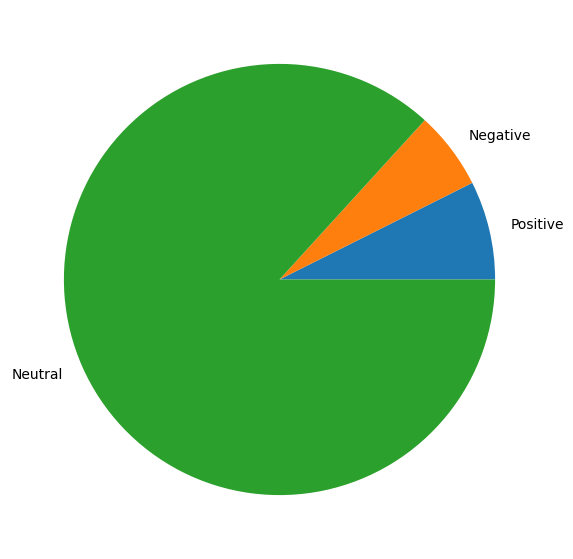

In [38]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 7))
plt.pie([positive, negative, neutral], labels=["Positive", "Negative", "Neutral"])

Test


In [39]:
y = df["Recommended IND"]

In [40]:
X = df.drop(columns="Recommended IND")

## Correlation heatmap


<Axes: >

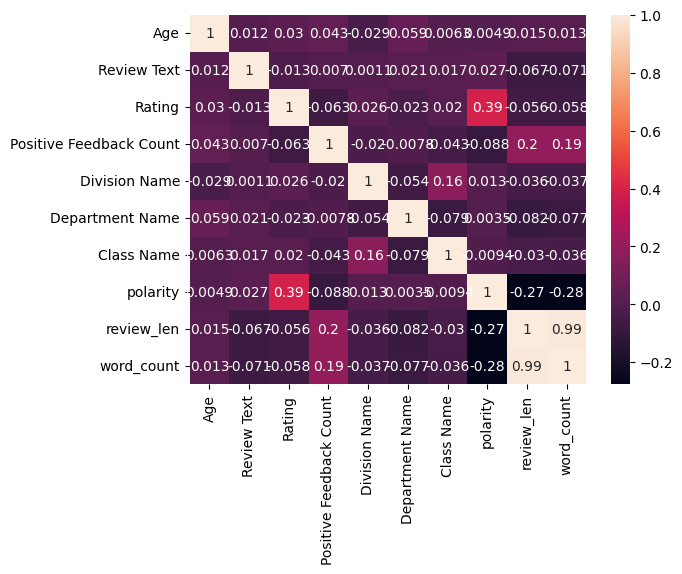

In [41]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

# Calculate correlation and plot heatmap
import seaborn as sns

sns.heatmap(X_encoded.corr(), annot=True)

# Handling Multi-colinearity


In [42]:
set1 = set()
cor = X_encoded.corr()
for i in cor.columns:
    for j in cor.columns:
        if cor[i][j] > 0.8 and i != j:
            set1.add(i)
print(set1)

{'word_count', 'review_len'}


In [43]:
X = X.drop(labels=["word_count"], axis=1)

In [44]:
X = X.drop(labels=["Division Name", "Department Name", "Class Name"], axis=1)

# Model Building


In [45]:
import nltk
import re

nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
corpus = []

In [47]:
X.index = np.arange(len(X))

RE + Tokenizing + Stemming + Corpus Creation


In [48]:
for i in range(len(X)):
    review = re.sub("[^a-zA-z]", " ", X["Review Text"][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(i) for i in review if not i in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

## Deep Learning model


In [49]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [50]:
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(corpus)

In [51]:
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, padding="post")

In [52]:
word_index = tokenizer.word_index
count = 0
for i, j in word_index.items():
    if count == 11:
        break
    print(i, j)
    count = count + 1

dress 1
fit 2
love 3
size 4
look 5
top 6
wear 7
like 8
color 9
great 10
would 11


In [53]:
embedding_dim = 64
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(3000, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(6, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
num_epochs = 100

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
model.fit(padded, y, epochs=num_epochs)

Epoch 1/10


708/708 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8183 - loss: 0.4771
Epoch 2/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8688 - loss: 0.2922
Epoch 3/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8905 - loss: 0.2504
Epoch 4/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.2251
Epoch 5/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9076 - loss: 0.2221
Epoch 6/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9119 - loss: 0.2140
Epoch 7/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9180 - loss: 0.2008
Epoch 8/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9176 - loss: 0.2021
Epoch 9/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9223 - loss: 0.1933
Epoch 10/10
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9227 - loss: 0.1884


### Testing with sample


In [92]:
sample_string = "I would not recommend this dress."
sample = tokenizer.texts_to_sequences(sample_string)
padded_sample = pad_sequences(sample, padding="post")

In [93]:
model.predict(padded_sample.T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[0.9993815]], dtype=float32)

### Input data


In [80]:
input_string = input()
inputs = tokenizer.texts_to_sequences(input_string)
padded_input = pad_sequences(inputs, padding="post")

In [81]:
model.predict(padded_input.T)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.97798264]], dtype=float32)